<a href="https://colab.research.google.com/github/mgalao/deep-learning-project/blob/main/project/DL_Models_from_scratch_carolina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">

# **1.** Environment Setup

<div>

## 1.1 Connect Google Drive

In [26]:
from google.colab import drive

In [27]:
drive.flush_and_unmount()

In [28]:
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import os

# # Change to the directory where project is located
# os.chdir('/content/drive/MyDrive/College/MSc/2nd Semester/Deep Learning/project')

# Change to the directory where project is located
os.chdir('/content/drive/MyDrive/FACULDADE/mestrado/')

# # Verify that we changed the directory
print("Changed directory to:", os.getcwd())

Changed directory to: /content/drive/MyDrive/FACULDADE/mestrado


## 1.2 Import Libraries

In [30]:
pip install keras_cv

In [31]:
import pandas as pd
import zipfile
import pickle
from sklearn.preprocessing import LabelEncoder
from pathlib import Path
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


from classes import *
from functions import *

In [32]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Concatenate, Dropout, Input, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.metrics import AUC, F1Score, CategoricalAccuracy, TopKCategoricalAccuracy
from sklearn.metrics import f1_score, precision_score, recall_score
from keras import optimizers
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D,
                                     Dense, Dropout, Concatenate, BatchNormalization)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import pandas as pd
from IPython.display import display
import tensorflow.keras.backend as K
import gc
from tensorflow.keras.layers import ReLU


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.3 Import Dataset

In [33]:
# #Load the DataFrames from the .pkl files
# with open("../data/train_df.pkl", "rb") as f:
#      train_df = pickle.load(f)

# with open("../data/val_df.pkl", "rb") as f:
#      val_df = pickle.load(f)

# with open("../data/test_df.pkl", "rb") as f:
#      test_df = pickle.load(f)

# with open("../data/train_df_sampled.pkl", "rb") as f:
#      train_df_sampled = pickle.load(f)

# with open("../data/family_encoder.pkl", "rb") as f:
#      family_encoder = pickle.load(f)

In [34]:
# FOR COLLAB
# Load the DataFrames from the .pkl files
with open("data/train_df.pkl", "rb") as f:
     train_df = pickle.load(f)

with open("data/val_df.pkl", "rb") as f:
     val_df = pickle.load(f)

with open("data/test_df.pkl", "rb") as f:
     test_df = pickle.load(f)

with open("data/train_df_sampled.pkl", "rb") as f:
     train_df_sampled = pickle.load(f)

with open("data/family_encoder.pkl", "rb") as f:
     family_encoder = pickle.load(f)

<div class="alert alert-block alert-success">

# **2.** Preprocessing

<div>

- Normalizes pixel values (e.g., rescaling from [0,255] to [0,1]).
- Resizes images to a fixed size (e.g., 224x224 pixels).
- Applies augmentation (only during training).
- Converts images to batches (e.g., batch_size=32 loads 32 images at a time).

In [35]:
minority_class = train_df['family'].value_counts()[train_df['family'].value_counts() < 25].index
minority_class=minority_class.to_list()

In [36]:
# batch_size = 32 ## the less the better because in each epoch the model sees N / batch_size images
# image_size = (224, 224)

# preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

# train_ds, class_names = preprocess.load_img(data_dir="data/rare_species/train", minority_class=minority_class, augment='medium', oversampling=True, shuffle=True)
# train_ds_sampled, class_names = preprocess.load_img(data_dir="data/rare_species/train_sampled", minority_class=minority_class, augment='medium', oversampling=True, shuffle=True)
# val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment=None, oversampling=False)
# test_ds, _ = preprocess.load_img(data_dir="data/rare_species/test", minority_class=minority_class, augment=None, oversampling=False)

In [37]:
# num_images = 32 ##
# rows, cols = 8, 4 ##

# plot_batch(train_ds, class_names=class_names, num_images=num_images, rows=rows, cols=cols)

## (augmentations)

In [38]:
# augmentations_to_test = [
#     # "none",
#     # "light",
#     # "medium",
#     # "heavy",
#     # "grayscale",
#     # "randaugment",
#     "mixup",
#     "cutmix"]

<!-- ##### Simple model do test augmentations -->

In [39]:
# def build_model(num_classes):
#     base = keras.applications.EfficientNetB0(
#         input_shape=(224, 224, 3),
#         include_top=False,
#         weights="imagenet",
#         pooling="avg"
#     )
#     base.trainable = False  # You can fine-tune later

#     inputs = keras.Input(shape=(224, 224, 3))
#     x = base(inputs, training=False)
#     x = keras.layers.Dropout(0.2)(x)
#     outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

#     return keras.Model(inputs, outputs)

In [40]:
# def sample_dataset(dataset, fraction=None, num_batches=None, seed=42):
#     """Return a sampled subset of the dataset."""
#     if fraction:
#         dataset = dataset.shuffle(1000, seed=seed)
#         dataset = dataset.take(int(fraction * tf.data.experimental.cardinality(dataset).numpy()))
#     elif num_batches:
#         dataset = dataset.take(num_batches)
#     return dataset

<!-- ##### Loop -->

In [41]:
# # Initialize the preprocessor
# pre = Preprocessor(image_size=(224, 224), batch_size=32)

# # Store results
# results = {}

# # Loop through each augmentation
# for aug in augmentations_to_test:
#     print(f"\nTraining with augmentation: {aug}")

#     # Load datasets
#     train_ds, class_names = pre.load_img(
#         data_dir="../data/rare_species/train",
#         augment=aug
#     )

#     val_ds, _ = pre.load_img(
#         data_dir="../data/rare_species/val",
#         augment=None
#     )

#     # Sample a subset of training data
#     train_ds = sample_dataset(train_ds, fraction=0.5)

#     # Build a fresh model (you should define this function)
#     model = build_sequential_model(list_of_layers=layers)

#     # Compile
#     model.compile(
#         optimizer="adam",
#         loss="categorical_crossentropy",
#         metrics=["accuracy"]
#     )

#     # Train
#     history = model.fit(
#         train_ds,
#         validation_data=val_ds,
#         epochs=5,
#         verbose=1
#     )

#     # Predict entire validation set at once
#     preds = model.predict(val_ds)
#     y_pred = np.argmax(preds, axis=1)

#     # Extract true labels in order
#     y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

#     # Compute metrics
#     f1_macro = f1_score(y_true, y_pred, average='macro')
#     f1_weighted = f1_score(y_true, y_pred, average='weighted')
#     precision = precision_score(y_true, y_pred, average='weighted')
#     recall = recall_score(y_true, y_pred, average='weighted')

#     # Store in results
#     results[aug] = {
#         "val_accuracy": history.history["val_accuracy"][-1],
#         "f1_macro": f1_macro,
#         "f1_weighted": f1_weighted,
#         "precision": precision,
#         "recall": recall
#     }

#     print(f"Finished '{aug}'")
#     print(f"  Accuracy:      {results[aug]['val_accuracy']:.4f}")
#     print(f"  F1 (macro):    {results[aug]['f1_macro']:.4f}")
#     print(f"  F1 (weighted): {results[aug]['f1_weighted']:.4f}")
#     print(f"  Precision:     {results[aug]['precision']:.4f}")
#     print(f"  Recall:        {results[aug]['recall']:.4f}")


In [42]:
# augmentations_to_test = [
#     "none",
#     "light",
#     "medium",
#     "heavy",
#     "grayscale",
#     "randaugment",
#     "mixup",
#     "cutmix"]

In [43]:
# # Initialize the preprocessor
# pre = Preprocessor(image_size=(224, 224), batch_size=32)

# # Store results
# results = {}

# # Loop through each augmentation
# for aug in augmentations_to_test:
#     print(f"\nTraining with augmentation: {aug}")

#     # Load datasets
#     train_ds, class_names = pre.load_img(
#         data_dir="../data/rare_species/train",
#         augment=aug
#     )

#     val_ds, _ = pre.load_img(
#         data_dir="../data/rare_species/val",
#         augment=None
#     )

#     # Sample a subset of training data
#     train_ds = sample_dataset(train_ds, fraction=0.5)

#     # Build a fresh model (you should define this function)
#     model = build_sequential_model(list_of_layers=layers)

#     # Compile
#     model.compile(
#         optimizer="adam",
#         loss="categorical_crossentropy",
#         metrics=["accuracy"]
#     )

#     # Train
#     history = model.fit(
#         train_ds,
#         validation_data=val_ds,
#         epochs=15,
#         verbose=1
#     )

#     # Predict entire validation set at once
#     preds = model.predict(val_ds)
#     y_pred = np.argmax(preds, axis=1)

#     # Extract true labels in order
#     y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

#     # Compute metrics
#     f1_macro = f1_score(y_true, y_pred, average='macro')
#     f1_weighted = f1_score(y_true, y_pred, average='weighted')
#     precision = precision_score(y_true, y_pred, average='weighted')
#     recall = recall_score(y_true, y_pred, average='weighted')

#     # Store in results
#     results[aug] = {
#         "val_accuracy": history.history["val_accuracy"][-1],
#         "f1_macro": f1_macro,
#         "f1_weighted": f1_weighted,
#         "precision": precision,
#         "recall": recall
#     }

#     print(f"Finished '{aug}'")
#     print(f"  Accuracy:      {results[aug]['val_accuracy']:.4f}")
#     print(f"  F1 (macro):    {results[aug]['f1_macro']:.4f}")
#     print(f"  F1 (weighted): {results[aug]['f1_weighted']:.4f}")
#     print(f"  Precision:     {results[aug]['precision']:.4f}")
#     print(f"  Recall:        {results[aug]['recall']:.4f}")


<div class="alert alert-block alert-success">

# **3.** Parameters

<div>

In [44]:
# Add callbacks
callbacks = [
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
    ,EarlyStopping(patience=7, restore_best_weights=True, monitor="val_loss", verbose=1)
]

In [45]:
metrics = [
    CategoricalAccuracy(name="accuracy"),
    AUC(name="auc"),
    F1Score(average="macro", name="f1_macro"),
    F1Score(average="weighted", name="f1_weighted"),
    TopKCategoricalAccuracy(k=5, name="top5_accuracy")
]

In [46]:
augmentations_to_test = [
    "none",
    "light",
    "mixup"
    "medium",
    "heavy",
    "grayscale_plus",
    "randaugment",
    ]

<div class="alert alert-block alert-success">

# **4.** Models

<div>

In [47]:
def build_alexnet(input_shape=(224, 224, 3), num_classes=202):
    model = Sequential()

    # Layer 1
    model.add(Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

    # Layer 2
    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

    # Layer 3
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Layer 4
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Layer 5
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

    # Flatten and FC
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

model = build_alexnet()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=metrics
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 54, 54, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 26, 26, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 202)            │       827,594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,576,010 (181.49 MB)

 Trainable params: 47,575,306 (181.49 MB)

 Non-trainable params: 704 (2.75 KB)

## 4.2 AlexNet - No oversampling


In [48]:
# Initialize the preprocessor
batch_size = 32
image_size = (224, 224)

preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

# Store results
results = {}

# Loop through each augmentation
for aug in augmentations_to_test:
    print(f"\nTraining with augmentation: {aug}")

    model = build_alexnet()

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=metrics
    )

    train_ds, class_names = preprocess.load_img(data_dir="data/rare_species/train", minority_class=minority_class, augment=aug, oversampling=False, shuffle=True)
    if aug=="grayscale_plus":
      val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment='grayscale', oversampling=False)
    else:
      val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment=None, oversampling=False)

    # Initialize the experiment
    experiment = Experiment(
        model=model,
        train_ds=train_ds,
        val_ds=val_ds,
        experiment_name=f"alexnet_with_{aug}_no_oversampling", # MUDAR NOME!!!!!!!!!!!!
        batch_size=32,
        image_size=(224, 224),
        save_model = False
    )

    # Run the experiment
    history = experiment.run_experiment(callbacks=callbacks, epochs=1)

    # Predict entire validation set at once
    preds = model.predict(val_ds)
    y_pred = np.argmax(preds, axis=1)

    # Extract true labels in order
    y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

    # Compute metrics
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    # Store in results
    train_eval = model.evaluate(train_ds, verbose=0)
    val_eval = model.evaluate(val_ds, verbose=0)

    metric_names = ["loss", "accuracy", "auc", "f1_macro", "f1_weighted", "top5_accuracy"]

    train_metrics = dict(zip(metric_names, train_eval))
    val_metrics = dict(zip(metric_names, val_eval))

    # Results
    results[aug] = {
        "train_loss": train_metrics["loss"],
        "val_loss": val_metrics["loss"],

        "train_accuracy": train_metrics["accuracy"],
        "val_accuracy": val_metrics["accuracy"],

        "train_f1_macro": train_metrics.get("f1_macro"),
        "val_f1_macro": val_metrics.get("f1_macro"),

        "val_f1_weighted": val_metrics.get("f1_weighted")
    }


Training with augmentation: none
Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
No checkpoint found, starting from scratch.
 97/263 ━━━━━━━━━━━━━━━━━━━━ 2:59 1s/step - accuracy: 0.0266 - auc: 0.6103 - f1_macro: 0.0020 - f1_weighted: 0.0092 - loss: 6.1449 - top5_accuracy: 0.0960

KeyboardInterrupt: 

In [ ]:
# Convert results to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.reset_index().rename(columns={'index': 'augmentation'})

# Display the table
display(results_df.round(4))


In [ ]:
# Melt the DataFrame for seaborn plotting
metrics_to_plot = ['train_accuracy', 'val_accuracy']
melted_df = results_df.melt(id_vars='augmentation', value_vars=metrics_to_plot,
                            var_name='metric', value_name='value')

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='augmentation', y='value', hue='metric')
plt.title("Comparison of Accuracy Across Augmentation Strategies")
plt.ylim(0, 0.4)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# # Initialize the preprocessor
# batch_size = 32 ## the less the better because in each epoch the model sees N / batch_size images
# image_size = (224, 224)

# preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

# # Store results
# results = {}

# # Loop through each augmentation
# for aug in augmentations_to_test:
#     print(f"\nTraining with augmentation: {aug}")

#     model = build_alexnet()

#     model.compile(
#         optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
#         loss=tf.keras.losses.CategoricalCrossentropy(),
#         metrics=metrics
#     )

#     train_ds, class_names = preprocess.load_img(data_dir="data/rare_species/train", minority_class=minority_class, augment=aug, oversampling=False, shuffle=True)
#     train_ds_sampled, class_names = preprocess.load_img(data_dir="data/rare_species/train_sampled", minority_class=minority_class, augment=aug, oversampling=False, shuffle=True)
#     val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment=None, oversampling=False)
#     test_ds, _ = preprocess.load_img(data_dir="data/rare_species/test", minority_class=minority_class, augment=None, oversampling=False)


#     # Initialize the experiment
#     experiment = Experiment(
#         model=model,
#         train_ds=train_ds_sampled,
#         val_ds=val_ds,
#         experiment_name=f"alexnet_with_{aug}_no_oversampling", # MUDAR NOME!!!!!!!!!!!!
#         batch_size=32,
#         image_size=(224, 224),
#         resume=False,
#         save_model = False
#     )

#     # Run the experiment
#     history = experiment.run_experiment(callbacks=callbacks, epochs=40)

#     # Predict entire validation set at once
#     preds = model.predict(val_ds)
#     y_pred = np.argmax(preds, axis=1)

#     # Extract true labels in order
#     y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

#     # Compute metrics
#     f1_macro = f1_score(y_true, y_pred, average='macro')
#     f1_weighted = f1_score(y_true, y_pred, average='weighted')
#     precision = precision_score(y_true, y_pred, average='weighted')
#     recall = recall_score(y_true, y_pred, average='weighted')

#     # Store in results
#     results[aug] = {
#         "accuracy": history.history["val_accuracy"][-1],
#         "f1_macro": f1_macro,
#         "f1_weighted": f1_weighted,
#         "precision": precision,
#         "recall": recall
#     }

#     print(f"Finished '{aug}'")
#     print(f"  Accuracy:      {results[aug]['accuracy']:.4f}")
#     print(f"  F1 (macro):    {results[aug]['f1_macro']:.4f}")
#     print(f"  F1 (weighted): {results[aug]['f1_weighted']:.4f}")
#     print(f"  Precision:     {results[aug]['precision']:.4f}")
#     print(f"  Recall:        {results[aug]['recall']:.4f}")


#     # Clear memory to avoid OOM
#     del model
#     del experiment
#     K.clear_session()
#     gc.collect()


In [ ]:
# # Convert results to a DataFrame
# results_df = pd.DataFrame.from_dict(results, orient='index')
# results_df = results_df.reset_index().rename(columns={'index': 'augmentation'})

# # Display the table
# display(results_df.round(4))

In [ ]:
# # Melt the DataFrame for seaborn plotting
# metrics_to_plot = ['accuracy', 'f1_macro', 'f1_weighted', 'precision', 'recall']
# melted_df = results_df.melt(id_vars='augmentation', value_vars=metrics_to_plot,
#                             var_name='metric', value_name='value')

# # Plot using seaborn
# plt.figure(figsize=(12, 6))
# sns.barplot(data=melted_df, x='augmentation', y='value', hue='metric')
# plt.title("Comparison of Metrics Across Augmentation Strategies")
# plt.ylim(0, 0.4)
# plt.xticks(rotation=45)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


## AlexNet with oversampling

In [ ]:
# Initialize the preprocessor
batch_size = 32
image_size = (224, 224)

preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

# Store results
results = {}

# Loop through each augmentation
for aug in augmentations_to_test:
    print(f"\nTraining with augmentation: {aug}")

    model = build_alexnet()

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=metrics
    )

    train_ds, class_names = preprocess.load_img(data_dir="data/rare_species/train", minority_class=minority_class, augment=aug, oversampling=True, shuffle=True)
    if aug=="grayscale_plus":
      val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment='grayscale', oversampling=False)
    else:
      val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment=None, oversampling=False)

    # Initialize the experiment
    experiment = Experiment(
        model=model,
        train_ds=train_ds,
        val_ds=val_ds,
        experiment_name=f"alexnet_with_{aug}_oversampling", # MUDAR NOME!!!!!!!!!!!!
        batch_size=32,
        image_size=(224, 224),
        save_model = False
    )

    # Run the experiment
    history = experiment.run_experiment(callbacks=callbacks, epochs=1)

    # Predict entire validation set at once
    preds = model.predict(val_ds)
    y_pred = np.argmax(preds, axis=1)

    # Extract true labels in order
    y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

    # Compute metrics
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    # Store in results
    train_eval = model.evaluate(train_ds, verbose=0)
    val_eval = model.evaluate(val_ds, verbose=0)

    metric_names = ["loss", "accuracy", "auc", "f1_macro", "f1_weighted", "top5_accuracy"]

    train_metrics = dict(zip(metric_names, train_eval))
    val_metrics = dict(zip(metric_names, val_eval))

    # Results
    results[aug] = {
        "train_loss": train_metrics["loss"],
        "val_loss": val_metrics["loss"],

        "train_accuracy": train_metrics["accuracy"],
        "val_accuracy": val_metrics["accuracy"],

        "train_f1_macro": train_metrics.get("f1_macro"),
        "val_f1_macro": val_metrics.get("f1_macro"),

        "val_f1_weighted": val_metrics.get("f1_weighted")
    }

## 4.3 ZF net - No oversampling

It’s very similar to AlexNet but with:

Smaller initial filters (7×7 instead of 11×11),
Smaller strides,
Overall more fine-grained feature extraction early on.

In [ ]:
def build_zfnet(input_shape=(224, 224, 3), num_classes=202):
    model = Sequential()

    # Conv Layer 1
    model.add(Conv2D(96, (7, 7), strides=2, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

    # Conv Layer 2
    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

    # Conv Layer 3
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Conv Layer 4
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Conv Layer 5
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu', kernel_regularizer=l2(1e-4)))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu', kernel_regularizer=l2(1e-4)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

model = build_zfnet()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=metrics
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 109, 109, 96)   │        14,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 109, 109, 96)   │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 54, 54, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 54, 54, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   150,999,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 202)            │       827,594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 172,335,818 (657.41 MB)

 Trainable params: 172,335,114 (657.41 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
# Initialize the preprocessor
batch_size = 32 ## the less the better because in each epoch the model sees N / batch_size images
image_size = (224, 224)

preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

# Store results
results = {}

# Loop through each augmentation
for aug in augmentations_to_test:
    print(f"\nTraining with augmentation: {aug}")

    model = build_zfnet()

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=metrics
    )

    train_ds, class_names = preprocess.load_img(data_dir="data/rare_species/train", minority_class=minority_class, augment=aug, oversampling=False, shuffle=True)
    train_ds_sampled, class_names = preprocess.load_img(data_dir="data/rare_species/train_sampled", minority_class=minority_class, augment=aug, oversampling=False, shuffle=True)
    val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment=None, oversampling=False)
    test_ds, _ = preprocess.load_img(data_dir="data/rare_species/test", minority_class=minority_class, augment=None, oversampling=False)

    # Initialize the experiment
    experiment = Experiment(
        model=model,
        train_ds=train_ds_sampled,
        val_ds=val_ds,
        experiment_name=f"zfnet_with_{aug}_no_oversampling", # MUDAR NOME!!!!!!!!!!!!
        batch_size=32,
        image_size=(224, 224),
        save_model=False
    )

    # Run the experiment
    history = experiment.run_experiment(callbacks=callbacks, epochs=40)

    # Predict entire validation set at once
    preds = model.predict(val_ds)
    y_pred = np.argmax(preds, axis=1)

    # Extract true labels in order
    y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

    # Compute metrics
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    # Store in results
    results[aug] = {
        "accuracy": history.history["val_accuracy"][-1],
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "precision": precision,
        "recall": recall
    }

    print(f"Finished '{aug}'")
    print(f"  Accuracy:      {results[aug]['accuracy']:.4f}")
    print(f"  F1 (macro):    {results[aug]['f1_macro']:.4f}")
    print(f"  F1 (weighted): {results[aug]['f1_weighted']:.4f}")
    print(f"  Precision:     {results[aug]['precision']:.4f}")
    print(f"  Recall:        {results[aug]['recall']:.4f}")

    # Clear memory to avoid OOM
    del model
    del experiment
    K.clear_session()
    gc.collect()



Training with augmentation: none
Found 8388 files belonging to 202 classes.
Found 4194 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 749 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 43s 214ms/step - accuracy: 0.0188 - auc: 0.6032 - f1_macro: 0.0014 - f1_weighted: 0.0037 - loss: 46128.8281 - top5_accuracy: 0.2542 - val_accuracy: 0.0223 - val_auc: 0.6408 - val_f1_macro: 2.1559e-04 - val_f1_weighted: 9.6938e-04 - val_loss: 23.2046 - val_top5_accuracy: 0.1018 - learning_rate: 0.0100
Epoch 2/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.0172 - auc: 0.6285 - f1_macro: 1.7005e-04 - f1_weighted: 6.5081e-04 - loss: 43.2986 - top5_accuracy: 0.0966 - val_accuracy: 0.0223 - val_auc: 0.6604 - val_f1_macro: 2.1559e-04 - val_f1_weighted: 9.6938e-04 - val_loss: 18.2397 - val_top5_accuracy: 0.1096 - learning_rate: 0.0100
Epoch 3/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accur

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with augmentation: grayscale_plus


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 8388 files belonging to 202 classes.
Found 4194 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 749 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 38s 209ms/step - accuracy: 0.0216 - auc: 0.6304 - f1_macro: 0.0017 - f1_weighted: 0.0065 - loss: 51056.4414 - top5_accuracy: 0.1520 - val_accuracy: 0.0223 - val_auc: 0.6662 - val_f1_macro: 2.1559e-04 - val_f1_weighted: 9.6938e-04 - val_loss: 23.8122 - val_top5_accuracy: 0.1096 - learning_rate: 0.0100
Epoch 2/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 111ms/step - accuracy: 0.0273 - auc: 0.6637 - f1_macro: 0.0013 - f1_weighted: 0.0063 - loss: 22.1152 - top5_accuracy: 0.1120 - val_accuracy: 0.0223 - val_auc: 0.6628 - val_f1_macro: 2.1559e-04 - val_f1_weighted: 9.6938e-04 - val_loss: 18.9764 - val_top5_accuracy: 0.1185 - learning_rate: 0.0100
Epoch 3/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 111ms/step - accuracy: 0.0200 - auc: 0.6689 - f1_macro: 8.73

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with augmentation: mixup


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 8388 files belonging to 202 classes.
Found 4194 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 749 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 36s 196ms/step - accuracy: 0.0184 - auc: 0.5886 - f1_macro: 0.0014 - f1_weighted: 0.0049 - loss: 33186.6133 - top5_accuracy: 0.1730 - val_accuracy: 0.0167 - val_auc: 0.6430 - val_f1_macro: 3.7735e-04 - val_f1_weighted: 0.0013 - val_loss: 24.1015 - val_top5_accuracy: 0.0751 - learning_rate: 0.0100
Epoch 2/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.0123 - auc: 0.6332 - f1_macro: 0.0014 - f1_weighted: 0.0039 - loss: 75.1437 - top5_accuracy: 0.0977 - val_accuracy: 0.0239 - val_auc: 0.6604 - val_f1_macro: 2.3138e-04 - val_f1_weighted: 0.0011 - val_loss: 19.5872 - val_top5_accuracy: 0.0957 - learning_rate: 0.0100
Epoch 3/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.0226 - auc: 0.6519 - f1_macro: 3.5864e-04 -

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Convert results to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.reset_index().rename(columns={'index': 'augmentation'})

# Display the table
display(results_df.round(4))


,augmentation,accuracy,f1_macro,f1_weighted,precision,recall
0,none,0.0223,0.0002,0.0010,0.0005,0.0223
1,grayscale_plus,0.0250,0.0002,0.0012,0.0006,0.0250
2,mixup,0.0250,0.0002,0.0012,0.0006,0.0250


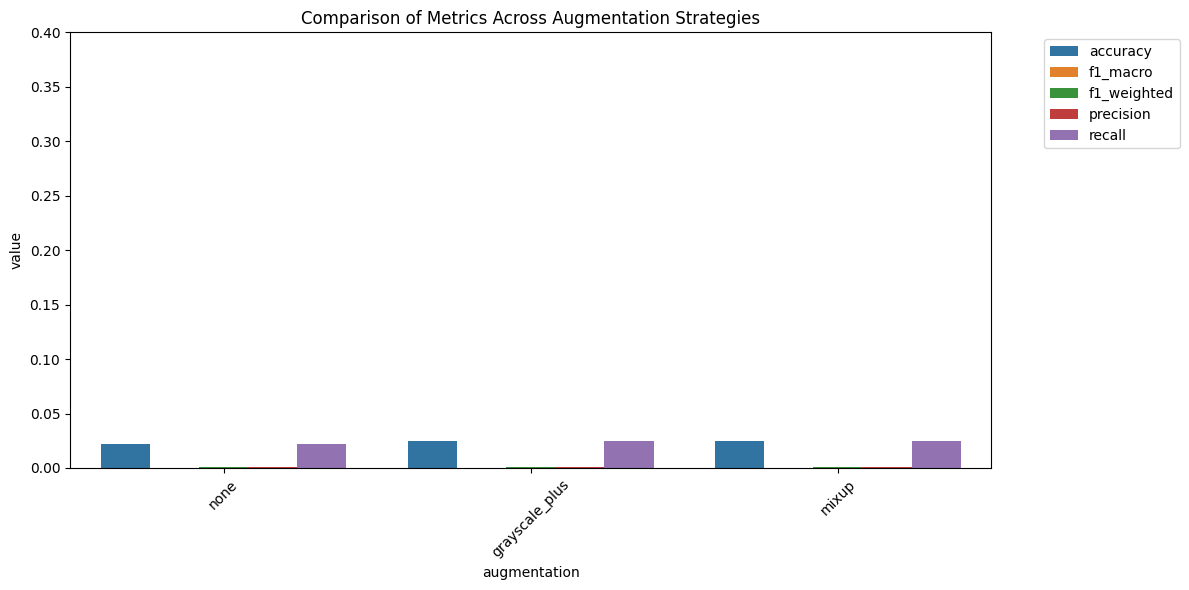

In [ ]:

# Melt the DataFrame for seaborn plotting
metrics_to_plot = ['accuracy', 'f1_macro', 'f1_weighted', 'precision', 'recall']
melted_df = results_df.melt(id_vars='augmentation', value_vars=metrics_to_plot,
                            var_name='metric', value_name='value')

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='augmentation', y='value', hue='metric')
plt.title("Comparison of Metrics Across Augmentation Strategies")
plt.ylim(0, 0.4)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 4.5 VGGNet - No oversampling

inspired by VGG16 — a deep and uniform architecture with 3x3 convolutions and max pooling.

In [ ]:
def build_vgg_model(input_shape=(224, 224, 3), num_classes=202):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Block 4 (optional to reduce overfitting)
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

model = build_vgg_model()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=metrics
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   102,760,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 202)            │       103,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,601,866 (399.02 MB)

 Trainable params: 104,600,970 (399.02 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
# Initialize the preprocessor
batch_size = 32 ## the less the better because in each epoch the model sees N / batch_size images
image_size = (224, 224)

preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

# Store results
results = {}

# Loop through each augmentation
for aug in augmentations_to_test:
    print(f"\nTraining with augmentation: {aug}")

    model = build_vgg_model()

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
        metrics=metrics
    )

    train_ds, class_names = preprocess.load_img(data_dir="data/rare_species/train", minority_class=minority_class, augment=aug, oversampling=False, shuffle=True)
    train_ds_sampled, class_names = preprocess.load_img(data_dir="data/rare_species/train_sampled", minority_class=minority_class, augment=aug, oversampling=False, shuffle=True)
    val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment=None, oversampling=False)
    test_ds, _ = preprocess.load_img(data_dir="data/rare_species/test", minority_class=minority_class, augment=None, oversampling=False)

    # Initialize the experiment
    experiment = Experiment(
        model=model,
        train_ds=train_ds_sampled,
        val_ds=val_ds,
        experiment_name=f"vggnet_with_{aug}_no_oversampling", # MUDAR NOME!!!!!!!!!!!!
        batch_size=32,
        image_size=(224, 224),
        save_model = False
    )

    # Run the experiment
    history = experiment.run_experiment(callbacks=callbacks, epochs=40)

    # Predict entire validation set at once
    preds = model.predict(val_ds)
    y_pred = np.argmax(preds, axis=1)

    # Extract true labels in order
    y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

    # Compute metrics
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    # Store in results
    results[aug] = {
        "accuracy": history.history["val_accuracy"][-1],
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "precision": precision,
        "recall": recall
    }

    print(f"Finished '{aug}'")
    print(f"  Accuracy:      {results[aug]['accuracy']:.4f}")
    print(f"  F1 (macro):    {results[aug]['f1_macro']:.4f}")
    print(f"  F1 (weighted): {results[aug]['f1_weighted']:.4f}")
    print(f"  Precision:     {results[aug]['precision']:.4f}")
    print(f"  Recall:        {results[aug]['recall']:.4f}")



    # Clear memory to avoid OOM
    del model
    del experiment
    K.clear_session()
    gc.collect()



Training with augmentation: none
Found 8388 files belonging to 202 classes.
Found 4194 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 749 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 83s 399ms/step - accuracy: 0.0220 - auc: 0.6234 - f1_macro: 0.0022 - f1_weighted: 0.0039 - loss: 127.4607 - top5_accuracy: 0.1234 - val_accuracy: 0.0050 - val_auc: 0.5218 - val_f1_macro: 0.0019 - val_f1_weighted: 0.0015 - val_loss: 826.8123 - val_top5_accuracy: 0.3428 - learning_rate: 0.0100
Epoch 2/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 29s 223ms/step - accuracy: 0.0200 - auc: 0.6501 - f1_macro: 1.9426e-04 - f1_weighted: 8.0456e-04 - loss: 5.1736 - top5_accuracy: 0.1048 - val_accuracy: 0.0245 - val_auc: 0.6599 - val_f1_macro: 5.6841e-04 - val_f1_weighted: 0.0018 - val_loss: 6.5003 - val_top5_accuracy: 0.1135 - learning_rate: 0.0100
Epoch 3/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 29s 223ms/step - accuracy: 0.0203 - a

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with augmentation: grayscale_plus


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 8388 files belonging to 202 classes.
Found 4194 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 749 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 50s 298ms/step - accuracy: 0.0181 - auc: 0.6212 - f1_macro: 5.7455e-04 - f1_weighted: 0.0023 - loss: 96.3492 - top5_accuracy: 0.1218 - val_accuracy: 0.0067 - val_auc: 0.5181 - val_f1_macro: 9.7821e-04 - val_f1_weighted: 0.0024 - val_loss: 303.2379 - val_top5_accuracy: 0.1247 - learning_rate: 0.0100
Epoch 2/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 30s 227ms/step - accuracy: 0.0234 - auc: 0.6534 - f1_macro: 2.2618e-04 - f1_weighted: 0.0011 - loss: 5.1455 - top5_accuracy: 0.1113 - val_accuracy: 0.0250 - val_auc: 0.6610 - val_f1_macro: 2.4794e-04 - val_f1_weighted: 0.0013 - val_loss: 5.1432 - val_top5_accuracy: 0.1152 - learning_rate: 0.0100
Epoch 3/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 30s 225ms/step - accuracy: 0.0234 - auc: 0.6575 - f1_macro: 2.2618e-

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with augmentation: mixup


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 8388 files belonging to 202 classes.
Found 4194 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 749 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 49s 298ms/step - accuracy: 0.0217 - auc: 0.6054 - f1_macro: 0.0015 - f1_weighted: 0.0032 - loss: 169.6764 - top5_accuracy: 0.1449 - val_accuracy: 0.0139 - val_auc: 0.6094 - val_f1_macro: 1.5887e-04 - val_f1_weighted: 8.0365e-04 - val_loss: 10.6255 - val_top5_accuracy: 0.0940 - learning_rate: 0.0100
Epoch 2/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 30s 227ms/step - accuracy: 0.0204 - auc: 0.6460 - f1_macro: 2.9920e-04 - f1_weighted: 0.0014 - loss: 5.1485 - top5_accuracy: 0.1100 - val_accuracy: 0.0250 - val_auc: 0.6584 - val_f1_macro: 2.4188e-04 - val_f1_weighted: 0.0012 - val_loss: 5.1113 - val_top5_accuracy: 0.1135 - learning_rate: 0.0100
Epoch 3/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 30s 226ms/step - accuracy: 0.0221 - auc: 0.6570 - f1_macro: 3.7954e-

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Convert results to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.reset_index().rename(columns={'index': 'augmentation'})

# Display the table
display(results_df.round(4))


,augmentation,accuracy,f1_macro,f1_weighted,precision,recall
0,none,0.0223,0.0002,0.0010,0.0005,0.0223
1,grayscale_plus,0.0250,0.0002,0.0012,0.0006,0.0250
2,mixup,0.0239,0.0002,0.0011,0.0006,0.0239


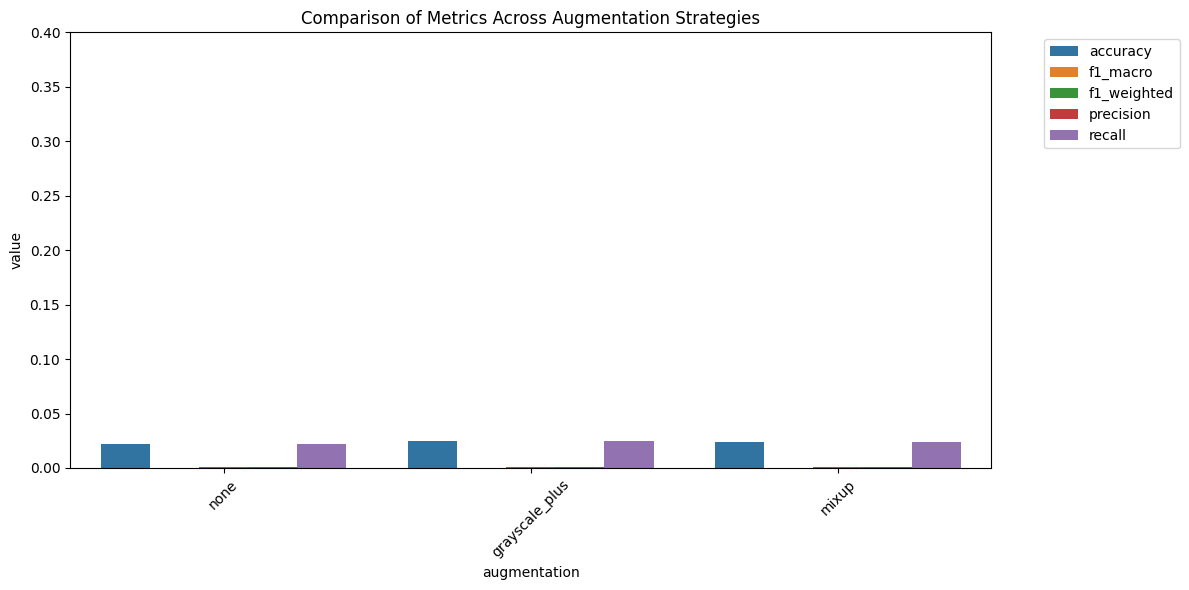

In [ ]:

# Melt the DataFrame for seaborn plotting
metrics_to_plot = ['accuracy', 'f1_macro', 'f1_weighted', 'precision', 'recall']
melted_df = results_df.melt(id_vars='augmentation', value_vars=metrics_to_plot,
                            var_name='metric', value_name='value')

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='augmentation', y='value', hue='metric')
plt.title("Comparison of Metrics Across Augmentation Strategies")
plt.ylim(0, 0.4)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## VGGNet2 - With oversampling

In [ ]:
def build_vgg_model(input_shape=(224, 224, 3), num_classes=202):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Block 4 (optional to reduce overfitting)
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

model = build_vgg_model()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=metrics
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   102,760,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 202)            │       103,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,601,866 (399.02 MB)

 Trainable params: 104,600,970 (399.02 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
# Initialize the preprocessor
batch_size = 32 ## the less the better because in each epoch the model sees N / batch_size images
image_size = (224, 224)

preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

# Store results
results = {}

# Loop through each augmentation
for aug in augmentations_to_test:
    print(f"\nTraining with augmentation: {aug}")

    model = build_vgg_model()

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=metrics
    )

    train_ds, class_names = preprocess.load_img(data_dir="data/rare_species/train", minority_class=minority_class, augment=aug, oversampling=True, shuffle=True)
    train_ds_sampled, class_names = preprocess.load_img(data_dir="data/rare_species/train_sampled", minority_class=minority_class, augment=aug, oversampling=True, shuffle=True)
    val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment=None, oversampling=False)
    test_ds, _ = preprocess.load_img(data_dir="data/rare_species/test", minority_class=minority_class, augment=None, oversampling=False)

    # Initialize the experiment
    experiment = Experiment(
        model=model,
        train_ds=train_ds_sampled,
        val_ds=val_ds,
        experiment_name=f"vggnet_with_{aug}_oversampling", # MUDAR NOME!!!!!!!!!!!!
        batch_size=32,
        image_size=(224, 224),
        save_model = False
    )

    # Run the experiment
    history = experiment.run_experiment(callbacks=callbacks, epochs=40)

    # Predict entire validation set at once
    preds = model.predict(val_ds)
    y_pred = np.argmax(preds, axis=1)

    # Extract true labels in order
    y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

    # Compute metrics
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    # Store in results
    results[aug] = {
        "accuracy": history.history["val_accuracy"][-1],
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "precision": precision,
        "recall": recall
    }

    print(f"Finished '{aug}'")
    print(f"  Accuracy:      {results[aug]['accuracy']:.4f}")
    print(f"  F1 (macro):    {results[aug]['f1_macro']:.4f}")
    print(f"  F1 (weighted): {results[aug]['f1_weighted']:.4f}")
    print(f"  Precision:     {results[aug]['precision']:.4f}")
    print(f"  Recall:        {results[aug]['recall']:.4f}")


    # Clear memory to avoid OOM
    del model
    del experiment
    K.clear_session()
    gc.collect()



Training with augmentation: none
Found 8388 files belonging to 202 classes.
Found 4194 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 749 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 54s 253ms/step - accuracy: 0.0202 - auc: 0.5918 - f1_macro: 0.0013 - f1_weighted: 0.0038 - loss: 120.3212 - top5_accuracy: 0.1295 - val_accuracy: 0.0262 - val_auc: 0.6052 - val_f1_macro: 8.8517e-04 - val_f1_weighted: 0.0028 - val_loss: 23.0474 - val_top5_accuracy: 0.1018 - learning_rate: 0.0100
Epoch 2/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 221ms/step - accuracy: 0.0212 - auc: 0.6043 - f1_macro: 3.9399e-04 - f1_weighted: 0.0017 - loss: 5.3263 - top5_accuracy: 0.0952 - val_accuracy: 0.0250 - val_auc: 0.6474 - val_f1_macro: 2.4360e-04 - val_f1_weighted: 0.0012 - val_loss: 5.1340 - val_top5_accuracy: 0.1163 - learning_rate: 0.0100
Epoch 3/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 221ms/step - accuracy: 0.0212 - au

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with augmentation: grayscale_plus


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 8388 files belonging to 202 classes.
Found 4194 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 749 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 55s 252ms/step - accuracy: 0.0202 - auc: 0.5897 - f1_macro: 0.0022 - f1_weighted: 0.0039 - loss: 119.1801 - top5_accuracy: 0.1293 - val_accuracy: 0.0250 - val_auc: 0.6366 - val_f1_macro: 2.5031e-04 - val_f1_weighted: 0.0013 - val_loss: 5.4159 - val_top5_accuracy: 0.1157 - learning_rate: 0.0100
Epoch 2/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 221ms/step - accuracy: 0.0152 - auc: 0.6005 - f1_macro: 2.6727e-04 - f1_weighted: 0.0010 - loss: 5.2119 - top5_accuracy: 0.0876 - val_accuracy: 0.0250 - val_auc: 0.6484 - val_f1_macro: 2.4201e-04 - val_f1_weighted: 0.0012 - val_loss: 5.1388 - val_top5_accuracy: 0.1185 - learning_rate: 0.0100
Epoch 3/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 221ms/step - accuracy: 0.0144 - auc: 0.6051 - f1_macro: 2.5238e-04 - 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with augmentation: mixup


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 8388 files belonging to 202 classes.
Found 4194 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 749 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 54s 251ms/step - accuracy: 0.0209 - auc: 0.5788 - f1_macro: 0.0023 - f1_weighted: 0.0046 - loss: 113.4940 - top5_accuracy: 0.1264 - val_accuracy: 0.0245 - val_auc: 0.6150 - val_f1_macro: 7.7438e-04 - val_f1_weighted: 0.0023 - val_loss: 9.0297 - val_top5_accuracy: 0.1013 - learning_rate: 0.0100
Epoch 2/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 221ms/step - accuracy: 0.0148 - auc: 0.5918 - f1_macro: 1.8515e-04 - f1_weighted: 6.5595e-04 - loss: 5.2156 - top5_accuracy: 0.0895 - val_accuracy: 0.0239 - val_auc: 0.6479 - val_f1_macro: 2.3189e-04 - val_f1_weighted: 0.0011 - val_loss: 5.1589 - val_top5_accuracy: 0.1169 - learning_rate: 0.0100
Epoch 3/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 221ms/step - accuracy: 0.0143 - auc: 0.5986 - f1_macro: 2.4645e-0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Convert results to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.reset_index().rename(columns={'index': 'augmentation'})

# Display the table
display(results_df.round(4))

,augmentation,accuracy,f1_macro,f1_weighted,precision,recall
0,none,0.0250,0.0002,0.0012,0.0006,0.0250
1,grayscale_plus,0.0256,0.0009,0.0022,0.0042,0.0256
2,mixup,0.0223,0.0002,0.0010,0.0005,0.0223


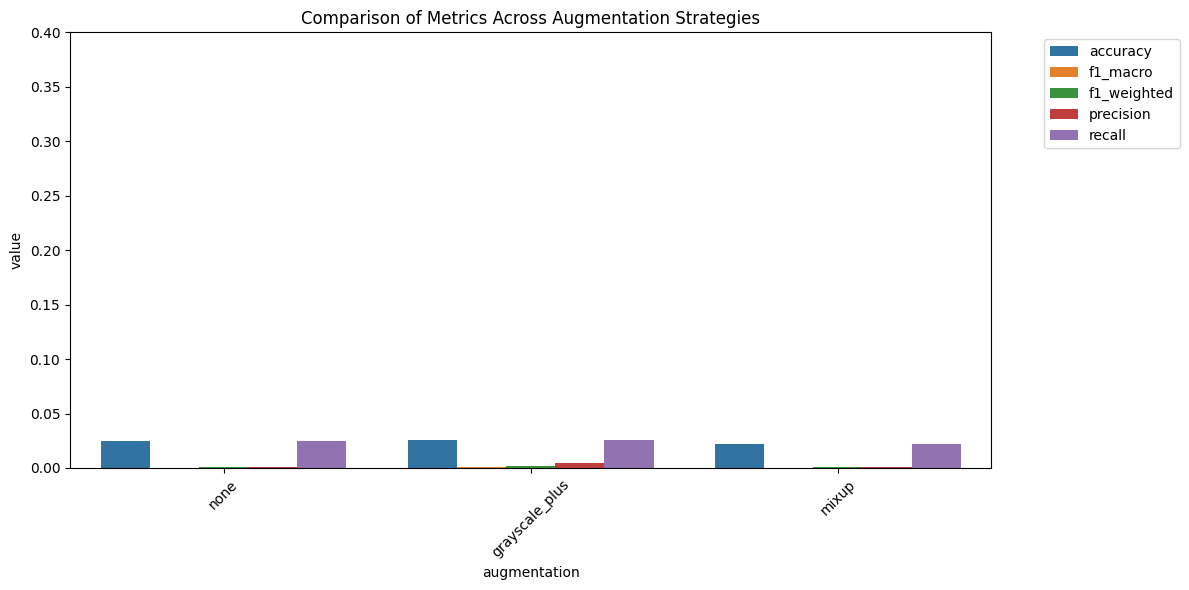

In [ ]:
# Melt the DataFrame for seaborn plotting
metrics_to_plot = ['accuracy', 'f1_macro', 'f1_weighted', 'precision', 'recall']
melted_df = results_df.melt(id_vars='augmentation', value_vars=metrics_to_plot,
                            var_name='metric', value_name='value')

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='augmentation', y='value', hue='metric')
plt.title("Comparison of Metrics Across Augmentation Strategies")
plt.ylim(0, 0.4)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 4.7 DenseNet - No Oversampling

In [ ]:

def dense_layer(x, growth_rate):
    """Single layer inside a dense block."""
    out = BatchNormalization()(x)
    out = ReLU()(out)
    out = Conv2D(growth_rate, (3, 3), padding='same', kernel_regularizer=l2(1e-4))(out)
    x = Concatenate()([x, out])  # Concatenate input and output (dense connection)
    return x

def dense_block(x, num_layers, growth_rate):
    """Dense block with several dense layers."""
    for _ in range(num_layers):
        x = dense_layer(x, growth_rate)
    return x

def transition_layer(x, reduction=0.5):
    """Reduces spatial size and number of filters."""
    filters = int(tf.keras.backend.int_shape(x)[-1] * reduction)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, (1, 1), padding='same', kernel_regularizer=l2(1e-4))(x)
    x = AveragePooling2D((2, 2), strides=2)(x)
    return x

def build_densenet(input_shape=(224, 224, 3), num_classes=202, growth_rate=32):
    inputs = Input(shape=input_shape)

    # Initial conv
    x = Conv2D(64, (7, 7), strides=2, padding='same', kernel_regularizer=l2(1e-4))(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = AveragePooling2D((3, 3), strides=2, padding='same')(x)

    # Dense Block 1
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)
    x = transition_layer(x)

    # Dense Block 2
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)
    x = transition_layer(x)

    # Dense Block 3
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)
    x = transition_layer(x)

    # Dense Block 4
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)

    # Classification
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs, outputs)

model = build_densenet()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=metrics
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │      9,472 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 112, 112,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling2d   │ (None, 56, 56,    │          0 │ re_lu[0][0]       │
│ (AveragePooling2D)  │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ average_pooling2… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 56,    │     18,464 │ re_lu_1[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 56, 56,    │          0 │ average_pooling2… │
│ (Concatenate)       │ 96)               │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        384 │ concatenate[0][0] │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     27,680 │ re_lu_2[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 56, 56,    │          0 │ concatenate[0][0… │
│ (Concatenate)       │ 128)              │            │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ concatenate_1[0]… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │     36,896 │ re_lu_3[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 56, 56,    │          0 │ concatenate_1[0]

 Total params: 817,922 (3.12 MB)

 Trainable params: 811,810 (3.10 MB)

 Non-trainable params: 6,112 (23.88 KB)

In [ ]:
# Initialize the preprocessor
batch_size = 32 ## the less the better because in each epoch the model sees N / batch_size images
image_size = (224, 224)

preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

# Store results
results = {}

# Loop through each augmentation
for aug in augmentations_to_test:
    print(f"\nTraining with augmentation: {aug}")

    model = build_densenet()

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=metrics
    )

    train_ds, class_names = preprocess.load_img(data_dir="data/rare_species/train", minority_class=minority_class, augment=aug, oversampling=False, shuffle=True)
    train_ds_sampled, class_names = preprocess.load_img(data_dir="data/rare_species/train_sampled", minority_class=minority_class, augment=aug, oversampling=False, shuffle=True)
    val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment=None, oversampling=False)
    test_ds, _ = preprocess.load_img(data_dir="data/rare_species/test", minority_class=minority_class, augment=None, oversampling=False)

    # Initialize the experiment
    experiment = Experiment(
        model=model,
        train_ds=train_ds_sampled,
        val_ds=val_ds,
        experiment_name=f"densenet_with_{aug}_no_oversampling", # MUDAR NOME!!!!!!!!!!!!
        batch_size=32,
        image_size=(224, 224),
        save_model = False
    )

    # Run the experiment
    history = experiment.run_experiment(callbacks=callbacks, epochs=40)

    # Predict entire validation set at once
    preds = model.predict(val_ds)
    y_pred = np.argmax(preds, axis=1)

    # Extract true labels in order
    y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

    # Compute metrics
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    # Store in results
    results[aug] = {
        "accuracy": history.history["val_accuracy"][-1],
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "precision": precision,
        "recall": recall
    }

    print(f"Finished '{aug}'")
    print(f"  Accuracy:      {results[aug]['accuracy']:.4f}")
    print(f"  F1 (macro):    {results[aug]['f1_macro']:.4f}")
    print(f"  F1 (weighted): {results[aug]['f1_weighted']:.4f}")
    print(f"  Precision:     {results[aug]['precision']:.4f}")
    print(f"  Recall:        {results[aug]['recall']:.4f}")

    # Clear memory to avoid OOM
    del model
    del experiment
    K.clear_session()
    gc.collect()



Training with augmentation: none
Found 8388 files belonging to 202 classes.
Found 4194 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 749 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.0223 - auc: 0.5766 - f1_macro: 0.0035 - f1_weighted: 0.0101 - loss: 7.7733 - top5_accuracy: 0.0712 - val_accuracy: 0.0161 - val_auc: 0.5892 - val_f1_macro: 0.0011 - val_f1_weighted: 0.0049 - val_loss: 16.5151 - val_top5_accuracy: 0.0757 - learning_rate: 0.0100
Epoch 2/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.0349 - auc: 0.6535 - f1_macro: 0.0046 - f1_weighted: 0.0136 - loss: 5.8001 - top5_accuracy: 0.1245 - val_accuracy: 0.0506 - val_auc: 0.6680 - val_f1_macro: 0.0045 - val_f1_weighted: 0.0191 - val_loss: 5.3546 - val_top5_accuracy: 0.1519 - learning_rate: 0.0100
Epoch 3/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.0446 - auc: 0.6783 - f1_macro

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with augmentation: grayscale_plus
Found 8388 files belonging to 202 classes.
Found 4194 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 749 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 76s 325ms/step - accuracy: 0.0655 - auc: 0.6699 - f1_macro: 0.0380 - f1_weighted: 0.0531 - loss: 8.2546 - top5_accuracy: 0.1769 - val_accuracy: 0.0312 - val_auc: 0.6542 - val_f1_macro: 0.0014 - val_f1_weighted: 0.0068 - val_loss: 5.4329 - val_top5_accuracy: 0.1163 - learning_rate: 0.0100
Epoch 2/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.0381 - auc: 0.6493 - f1_macro: 0.0041 - f1_weighted: 0.0134 - loss: 5.5683 - top5_accuracy: 0.1248 - val_accuracy: 0.0423 - val_auc: 0.6693 - val_f1_macro: 0.0018 - val_f1_weighted: 0.0087 - val_loss: 5.2828 - val_top5_accuracy: 0.1308 - learning_rate: 0.0100
Epoch 3/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.0426 - auc: 0.6783

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with augmentation: mixup
Found 8388 files belonging to 202 classes.
Found 4194 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 749 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 70s 294ms/step - accuracy: 0.0456 - auc: 0.6308 - f1_macro: 0.0131 - f1_weighted: 0.0280 - loss: 7.8470 - top5_accuracy: 0.1332 - val_accuracy: 0.0189 - val_auc: 0.6069 - val_f1_macro: 7.7032e-04 - val_f1_weighted: 0.0029 - val_loss: 7.7505 - val_top5_accuracy: 0.0868 - learning_rate: 0.0100
Epoch 2/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.0261 - auc: 0.6540 - f1_macro: 0.0027 - f1_weighted: 0.0111 - loss: 5.6106 - top5_accuracy: 0.1183 - val_accuracy: 0.0250 - val_auc: 0.6596 - val_f1_macro: 0.0011 - val_f1_weighted: 0.0047 - val_loss: 5.3677 - val_top5_accuracy: 0.1091 - learning_rate: 0.0100
Epoch 3/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.0325 - auc: 0.6502 - f1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Convert results to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.reset_index().rename(columns={'index': 'augmentation'})

# Display the table
display(results_df.round(4))


,augmentation,accuracy,f1_macro,f1_weighted,precision,recall
0,none,0.1068,0.0624,0.0864,0.0895,0.1068
1,grayscale_plus,0.0707,0.0196,0.0427,0.0444,0.0707
2,mixup,0.0907,0.0344,0.0596,0.0597,0.0907


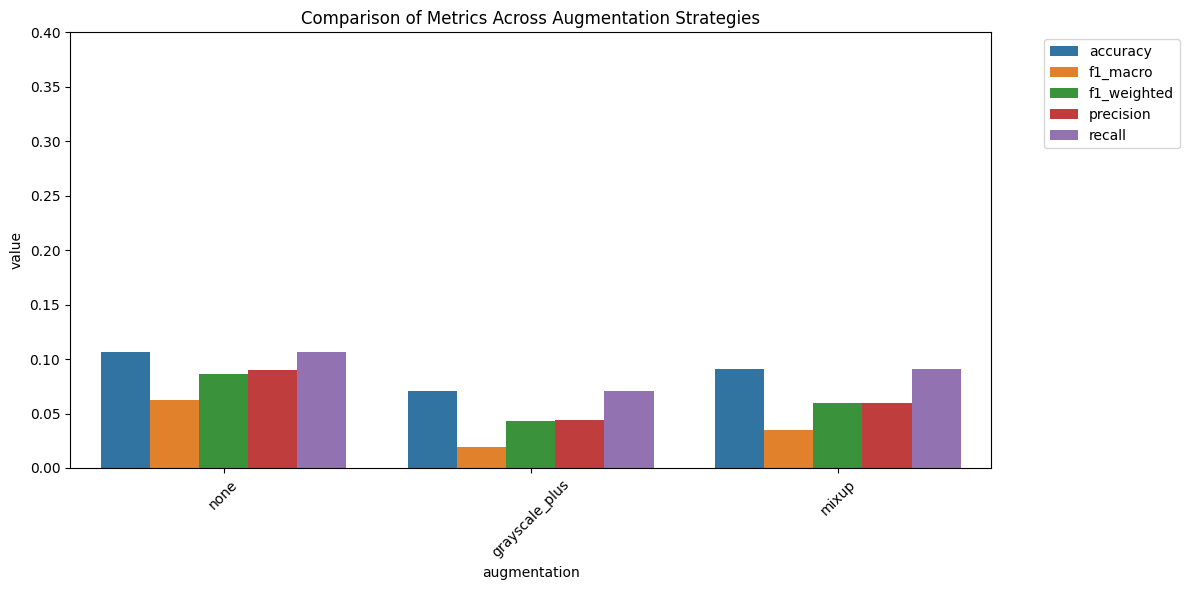

In [ ]:
# Melt the DataFrame for seaborn plotting
metrics_to_plot = ['accuracy', 'f1_macro', 'f1_weighted', 'precision', 'recall']
melted_df = results_df.melt(id_vars='augmentation', value_vars=metrics_to_plot,
                            var_name='metric', value_name='value')

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='augmentation', y='value', hue='metric')
plt.title("Comparison of Metrics Across Augmentation Strategies")
plt.ylim(0, 0.4)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## DenseNet 2 - With Oversampling

In [ ]:

def dense_layer(x, growth_rate):
    """Single layer inside a dense block."""
    out = BatchNormalization()(x)
    out = ReLU()(out)
    out = Conv2D(growth_rate, (3, 3), padding='same', kernel_regularizer=l2(1e-4))(out)
    x = Concatenate()([x, out])  # Concatenate input and output (dense connection)
    return x

def dense_block(x, num_layers, growth_rate):
    """Dense block with several dense layers."""
    for _ in range(num_layers):
        x = dense_layer(x, growth_rate)
    return x

def transition_layer(x, reduction=0.5):
    """Reduces spatial size and number of filters."""
    filters = int(tf.keras.backend.int_shape(x)[-1] * reduction)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, (1, 1), padding='same', kernel_regularizer=l2(1e-4))(x)
    x = AveragePooling2D((2, 2), strides=2)(x)
    return x

def build_densenet(input_shape=(224, 224, 3), num_classes=202, growth_rate=32):
    inputs = Input(shape=input_shape)

    # Initial conv
    x = Conv2D(64, (7, 7), strides=2, padding='same', kernel_regularizer=l2(1e-4))(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = AveragePooling2D((3, 3), strides=2, padding='same')(x)

    # Dense Block 1
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)
    x = transition_layer(x)

    # Dense Block 2
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)
    x = transition_layer(x)

    # Dense Block 3
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)
    x = transition_layer(x)

    # Dense Block 4
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)

    # Classification
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs, outputs)

model = build_densenet()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=metrics
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │      9,472 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 112, 112,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling2d   │ (None, 56, 56,    │          0 │ re_lu[0][0]       │
│ (AveragePooling2D)  │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ average_pooling2… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 56,    │     18,464 │ re_lu_1[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 56, 56,    │          0 │ average_pooling2… │
│ (Concatenate)       │ 96)               │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        384 │ concatenate[0][0] │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     27,680 │ re_lu_2[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 56, 56,    │          0 │ concatenate[0][0… │
│ (Concatenate)       │ 128)              │            │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ concatenate_1[0]… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │     36,896 │ re_lu_3[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 56, 56,    │          0 │ concatenate_1[0]

 Total params: 817,922 (3.12 MB)

 Trainable params: 811,810 (3.10 MB)

 Non-trainable params: 6,112 (23.88 KB)

In [ ]:
# Initialize the preprocessor
batch_size = 32 ## the less the better because in each epoch the model sees N / batch_size images
image_size = (224, 224)

preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

# Store results
results = {}

# Loop through each augmentation
for aug in augmentations_to_test:
    print(f"\nTraining with augmentation: {aug}")

    model = build_densenet()

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=metrics
    )

    train_ds, class_names = preprocess.load_img(data_dir="data/rare_species/train", minority_class=minority_class, augment=aug, oversampling=True, shuffle=True)
    train_ds_sampled, class_names = preprocess.load_img(data_dir="data/rare_species/train_sampled", minority_class=minority_class, augment=aug, oversampling=True, shuffle=True)
    val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment=None, oversampling=False)
    test_ds, _ = preprocess.load_img(data_dir="data/rare_species/test", minority_class=minority_class, augment=None, oversampling=False)

    # Initialize the experiment
    experiment = Experiment(
        model=model,
        train_ds=train_ds_sampled,
        val_ds=val_ds,
        experiment_name=f"densenet_with_{aug}_oversampling", # MUDAR NOME!!!!!!!!!!!!
        batch_size=32,
        image_size=(224, 224),
        save_model = False
    )

    # Run the experiment
    history = experiment.run_experiment(callbacks=callbacks, epochs=40)

    # Predict entire validation set at once
    preds = model.predict(val_ds)
    y_pred = np.argmax(preds, axis=1)

    # Extract true labels in order
    y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

    # Compute metrics
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    # Store in results
    results[aug] = {
        "accuracy": history.history["val_accuracy"][-1],
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "precision": precision,
        "recall": recall
    }

    print(f"Finished '{aug}'")
    print(f"  Accuracy:      {results[aug]['accuracy']:.4f}")
    print(f"  F1 (macro):    {results[aug]['f1_macro']:.4f}")
    print(f"  F1 (weighted): {results[aug]['f1_weighted']:.4f}")
    print(f"  Precision:     {results[aug]['precision']:.4f}")
    print(f"  Recall:        {results[aug]['recall']:.4f}")

    # Clear memory to avoid OOM
    del model
    del experiment
    K.clear_session()
    gc.collect()



Training with augmentation: none
Found 8388 files belonging to 202 classes.
Found 4194 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 749 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 55s 132ms/step - accuracy: 0.0460 - auc: 0.6265 - f1_macro: 0.0208 - f1_weighted: 0.0352 - loss: 8.8930 - top5_accuracy: 0.1278 - val_accuracy: 0.0184 - val_auc: 0.5982 - val_f1_macro: 0.0024 - val_f1_weighted: 0.0067 - val_loss: 5.6827 - val_top5_accuracy: 0.0640 - learning_rate: 0.0100
Epoch 2/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.0242 - auc: 0.5969 - f1_macro: 0.0044 - f1_weighted: 0.0097 - loss: 5.8467 - top5_accuracy: 0.0917 - val_accuracy: 0.0317 - val_auc: 0.6170 - val_f1_macro: 0.0042 - val_f1_weighted: 0.0118 - val_loss: 5.6268 - val_top5_accuracy: 0.1113 - learning_rate: 0.0100
Epoch 3/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.0284 - auc: 0.6241 - f1_macr

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with augmentation: grayscale_plus
Found 8388 files belonging to 202 classes.
Found 4194 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 749 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 62s 166ms/step - accuracy: 0.0464 - auc: 0.6341 - f1_macro: 0.0276 - f1_weighted: 0.0352 - loss: 8.2846 - top5_accuracy: 0.1331 - val_accuracy: 0.0245 - val_auc: 0.6328 - val_f1_macro: 0.0011 - val_f1_weighted: 0.0043 - val_loss: 5.9573 - val_top5_accuracy: 0.1013 - learning_rate: 0.0100
Epoch 2/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.0235 - auc: 0.6052 - f1_macro: 0.0033 - f1_weighted: 0.0085 - loss: 5.7064 - top5_accuracy: 0.0873 - val_accuracy: 0.0334 - val_auc: 0.6547 - val_f1_macro: 0.0017 - val_f1_weighted: 0.0076 - val_loss: 5.3454 - val_top5_accuracy: 0.1369 - learning_rate: 0.0100
Epoch 3/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.0318 - auc: 0.6438

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training with augmentation: mixup
Found 8388 files belonging to 202 classes.
Found 4194 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 749 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 55s 129ms/step - accuracy: 0.0340 - auc: 0.5849 - f1_macro: 0.0130 - f1_weighted: 0.0205 - loss: 7.8102 - top5_accuracy: 0.0983 - val_accuracy: 0.0267 - val_auc: 0.6335 - val_f1_macro: 8.7751e-04 - val_f1_weighted: 0.0043 - val_loss: 6.2711 - val_top5_accuracy: 0.1174 - learning_rate: 0.0100
Epoch 2/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.0181 - auc: 0.5769 - f1_macro: 0.0026 - f1_weighted: 0.0060 - loss: 5.8761 - top5_accuracy: 0.0777 - val_accuracy: 0.0306 - val_auc: 0.6480 - val_f1_macro: 0.0016 - val_f1_weighted: 0.0053 - val_loss: 5.3909 - val_top5_accuracy: 0.1130 - learning_rate: 0.0100
Epoch 3/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.0216 - auc: 0.5925 - f1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Convert results to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.reset_index().rename(columns={'index': 'augmentation'})

# Display the table
display(results_df.round(4))


,augmentation,accuracy,f1_macro,f1_weighted,precision,recall
0,none,0.0885,0.0501,0.0654,0.0690,0.0885
1,grayscale_plus,0.0612,0.0213,0.0346,0.0303,0.0612
2,mixup,0.0801,0.0359,0.0573,0.0570,0.0801


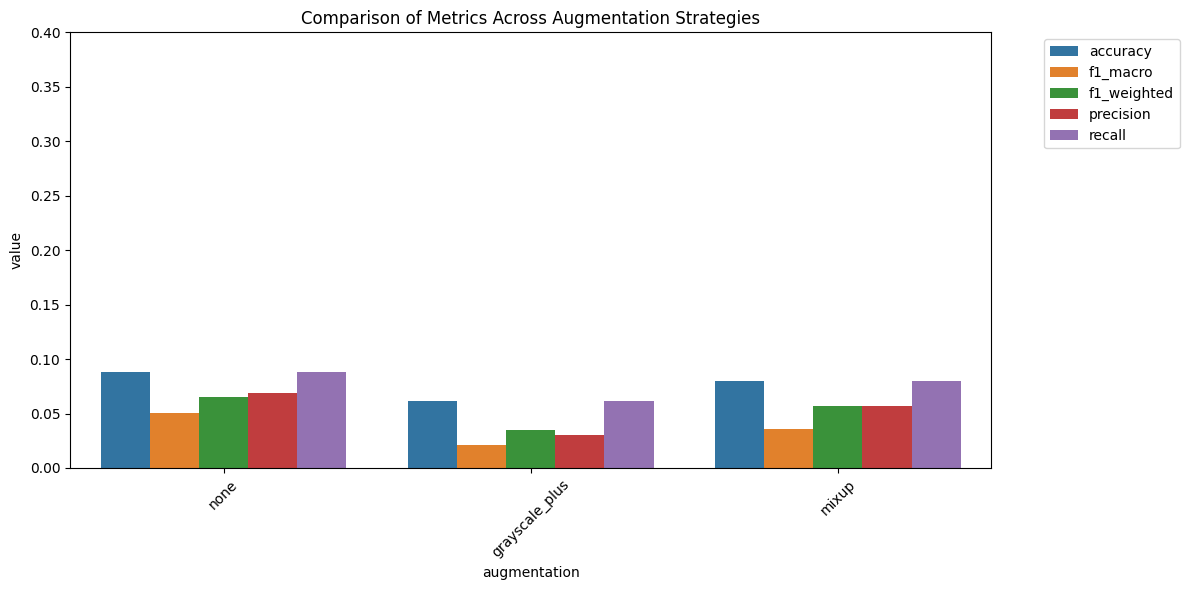

In [ ]:
# Melt the DataFrame for seaborn plotting
metrics_to_plot = ['accuracy', 'f1_macro', 'f1_weighted', 'precision', 'recall']
melted_df = results_df.melt(id_vars='augmentation', value_vars=metrics_to_plot,
                            var_name='metric', value_name='value')

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='augmentation', y='value', hue='metric')
plt.title("Comparison of Metrics Across Augmentation Strategies")
plt.ylim(0, 0.4)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## DenseNet Grayscale Augmentation - With Oversampling

In [ ]:
def dense_layer(x, growth_rate):
    """Single layer inside a dense block."""
    out = BatchNormalization()(x)
    out = ReLU()(out)
    out = Conv2D(growth_rate, (3, 3), padding='same', kernel_regularizer=l2(1e-4))(out)
    x = Concatenate()([x, out])  # Concatenate input and output (dense connection)
    return x

def dense_block(x, num_layers, growth_rate):
    """Dense block with several dense layers."""
    for _ in range(num_layers):
        x = dense_layer(x, growth_rate)
    return x

def transition_layer(x, reduction=0.5):
    """Reduces spatial size and number of filters."""
    filters = int(tf.keras.backend.int_shape(x)[-1] * reduction)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, (1, 1), padding='same', kernel_regularizer=l2(1e-4))(x)
    x = AveragePooling2D((2, 2), strides=2)(x)
    return x

def build_densenet(input_shape=(224, 224, 3), num_classes=202, growth_rate=32):
    inputs = Input(shape=input_shape)

    # Initial conv
    x = Conv2D(64, (7, 7), strides=2, padding='same', kernel_regularizer=l2(1e-4))(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = AveragePooling2D((3, 3), strides=2, padding='same')(x)

    # Dense Block 1
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)
    x = transition_layer(x)

    # Dense Block 2
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)
    x = transition_layer(x)

    # Dense Block 3
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)
    x = transition_layer(x)

    # Dense Block 4
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)

    # Classification
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs, outputs)

model = build_densenet()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=metrics
)

model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │      9,472 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 112, 112,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling2d   │ (None, 56, 56,    │          0 │ re_lu[0][0]       │
│ (AveragePooling2D)  │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ average_pooling2… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 56,    │     18,464 │ re_lu_1[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 56, 56,    │          0 │ average_pooling2… │
│ (Concatenate)       │ 96)               │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        384 │ concatenate[0][0] │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     27,680 │ re_lu_2[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 56, 56,    │          0 │ concatenate[0][0… │
│ (Concatenate)       │ 128)              │            │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ concatenate_1[0]… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │     36,896 │ re_lu_3[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 56, 56,    │          0 │ concatenate_1[0]

 Total params: 817,922 (3.12 MB)

 Trainable params: 811,810 (3.10 MB)

 Non-trainable params: 6,112 (23.88 KB)

In [ ]:
# Initialize the preprocessor
batch_size = 32 ## the less the better because in each epoch the model sees N / batch_size images
image_size = (224, 224)

preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

# Store results
results = {}

print(f"\nTraining with augmentation: greysclae")

model = build_densenet()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=metrics
)

train_ds, class_names = preprocess.load_img(data_dir="data/rare_species/train", minority_class=minority_class, augment='grayscale_plus', oversampling=True, shuffle=True)
train_ds_sampled, class_names = preprocess.load_img(data_dir="data/rare_species/train_sampled", minority_class=minority_class, augment='grayscale_plus', oversampling=True, shuffle=True)
val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment='grayscale', oversampling=False)
test_ds, _ = preprocess.load_img(data_dir="data/rare_species/test", minority_class=minority_class, augment='grayscale', oversampling=False)

# Initialize the experiment
experiment = Experiment(
    model=model,
    train_ds=train_ds_sampled,
    val_ds=val_ds,
    experiment_name=f"densenet_with_gray_scale_oversampling_2", # MUDAR NOME!!!!!!!!!!!!
    batch_size=32,
    image_size=(224, 224),
    save_model = False
)

# Run the experiment
history = experiment.run_experiment(callbacks=callbacks, epochs=40)

# Predict entire validation set at once
preds = model.predict(val_ds)
y_pred = np.argmax(preds, axis=1)

# Extract true labels in order
y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

# Compute metrics
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

# Store in results
results['grayscale'] = {
    "accuracy": history.history["val_accuracy"][-1],
    "f1_macro": f1_macro,
    "f1_weighted": f1_weighted,
    "precision": precision,
    "recall": recall
}

print(f"Finished '{'grayscale'}'")
print(f"  Accuracy:      {results['grayscale']['accuracy']:.4f}")
print(f"  F1 (macro):    {results['grayscale']['f1_macro']:.4f}")
print(f"  F1 (weighted): {results['grayscale']['f1_weighted']:.4f}")
print(f"  Precision:     {results['garyscale']['precision']:.4f}")
print(f"  Recall:        {results['grayscale']['recall']:.4f}")




Training with augmentation: greysclae
Found 8388 files belonging to 202 classes.
Found 4194 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 749 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 64s 165ms/step - accuracy: 0.0101 - auc: 0.5342 - f1_macro: 0.0013 - f1_weighted: 0.0042 - loss: 7.8880 - top5_accuracy: 0.0577 - val_accuracy: 0.0250 - val_auc: 0.6252 - val_f1_macro: 0.0012 - val_f1_weighted: 0.0056 - val_loss: 5.5427 - val_top5_accuracy: 0.1024 - learning_rate: 0.0100
Epoch 2/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.0302 - auc: 0.6059 - f1_macro: 0.0026 - f1_weighted: 0.0093 - loss: 5.7435 - top5_accuracy: 0.0970 - val_accuracy: 0.0189 - val_auc: 0.5972 - val_f1_macro: 4.5906e-04 - val_f1_weighted: 0.0021 - val_loss: 6.1200 - val_top5_accuracy: 0.0935 - learning_rate: 0.0100
Epoch 3/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.0328 - auc: 0.6245 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KeyError: 'garyscale'

In [ ]:
# Store in results
results['grayscale'] = {
    "accuracy": history.history["val_accuracy"][-1],
    "f1_macro": f1_macro,
    "f1_weighted": f1_weighted,
    "precision": precision,
    "recall": recall
}

print(f"Finished '{'grayscale'}'")
print(f"  Accuracy:      {results['grayscale']['accuracy']:.4f}")
print(f"  F1 (macro):    {results['grayscale']['f1_macro']:.4f}")
print(f"  F1 (weighted): {results['grayscale']['f1_weighted']:.4f}")
print(f"  Precision:     {results['grayscale']['precision']:.4f}")
print(f"  Recall:        {results['grayscale']['recall']:.4f}")

# Clear memory to avoid OOM
del model
del experiment
K.clear_session()
gc.collect()

Finished 'grayscale'
  Accuracy:      0.0529
  F1 (macro):    0.0112
  F1 (weighted): 0.0285
  Precision:     0.0249
  Recall:        0.0529


0

## DenseNet Medium Augmentation - With Oversampling

In [ ]:
def dense_layer(x, growth_rate):
    """Single layer inside a dense block."""
    out = BatchNormalization()(x)
    out = ReLU()(out)
    out = Conv2D(growth_rate, (3, 3), padding='same', kernel_regularizer=l2(1e-4))(out)
    x = Concatenate()([x, out])  # Concatenate input and output (dense connection)
    return x

def dense_block(x, num_layers, growth_rate):
    """Dense block with several -dense layers."""
    for _ in range(num_layers):
        x = dense_layer(x, growth_rate)
    return x

def transition_layer(x, reduction=0.5):
    """Reduces spatial size and number of filters."""
    filters = int(tf.keras.backend.int_shape(x)[-1] * reduction)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, (1, 1), padding='same', kernel_regularizer=l2(1e-4))(x)
    x = AveragePooling2D((2, 2), strides=2)(x)
    return x

def build_densenet(input_shape=(224, 224, 3), num_classes=202, growth_rate=32):
    inputs = Input(shape=input_shape)

    # Initial conv
    x = Conv2D(64, (7, 7), strides=2, padding='same', kernel_regularizer=l2(1e-4))(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = AveragePooling2D((3, 3), strides=2, padding='same')(x)

    # Dense Block 1
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)
    x = transition_layer(x)

    # Dense Block 2
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)
    x = transition_layer(x)

    # Dense Block 3
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)
    x = transition_layer(x)

    # Dense Block 4
    x = dense_block(x, num_layers=4, growth_rate=growth_rate)

    # Classification
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs, outputs)

model = build_densenet()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=metrics
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │      9,472 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 112, 112,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling2d   │ (None, 56, 56,    │          0 │ re_lu[0][0]       │
│ (AveragePooling2D)  │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ average_pooling2… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 56,    │     18,464 │ re_lu_1[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 56, 56,    │          0 │ average_pooling2… │
│ (Concatenate)       │ 96)               │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        384 │ concatenate[0][0] │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     27,680 │ re_lu_2[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 56, 56,    │          0 │ concatenate[0][0… │
│ (Concatenate)       │ 128)              │            │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ concatenate_1[0]… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │     36,896 │ re_lu_3[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 56, 56,    │          0 │ concatenate_1[0]

 Total params: 817,922 (3.12 MB)

 Trainable params: 811,810 (3.10 MB)

 Non-trainable params: 6,112 (23.88 KB)

In [ ]:
# Initialize the preprocessor
batch_size = 32 ## the less the better because in each epoch the model sees N / batch_size images
image_size = (224, 224)

preprocess = Preprocessor(image_size=image_size, batch_size=batch_size)

# Store results
results = {}

print(f"\nTraining with augmentation: medium")

model = build_densenet()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=metrics
)

train_ds, class_names = preprocess.load_img(data_dir="data/rare_species/train", minority_class=minority_class, augment='medium', oversampling=True, shuffle=True)
train_ds_sampled, class_names = preprocess.load_img(data_dir="data/rare_species/train_sampled", minority_class=minority_class, augment='medium', oversampling=True, shuffle=True)
val_ds, _ = preprocess.load_img(data_dir="data/rare_species/val", minority_class=minority_class, augment=None, oversampling=False)
test_ds, _ = preprocess.load_img(data_dir="data/rare_species/test", minority_class=minority_class, augment=None, oversampling=False)

# Initialize the experiment
experiment = Experiment(
    model=model,
    train_ds=train_ds_sampled,
    val_ds=val_ds,
    experiment_name=f"densenet_with_medium_oversampling_2", # MUDAR NOME!!!!!!!!!!!!
    batch_size=32,
    image_size=(224, 224),
    save_model = False
)

# Run the experiment
history = experiment.run_experiment(callbacks=callbacks, epochs=40)

# Predict entire validation set at once
preds = model.predict(val_ds)
y_pred = np.argmax(preds, axis=1)

# Extract true labels in order
y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in val_ds])

# Compute metrics
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

# Store in results
results['medium'] = {
    "accuracy": history.history["val_accuracy"][-1],
    "f1_macro": f1_macro,
    "f1_weighted": f1_weighted,
    "precision": precision,
    "recall": recall
}

print(f"Finished '{'medium'}'")
print(f"  Accuracy:      {results['medium']['accuracy']:.4f}")
print(f"  F1 (macro):    {results['medium']['f1_macro']:.4f}")
print(f"  F1 (weighted): {results['medium']['f1_weighted']:.4f}")
print(f"  Precision:     {results['medium']['precision']:.4f}")
print(f"  Recall:        {results['medium']['recall']:.4f}")




Training with augmentation: medium
Found 8388 files belonging to 202 classes.
Found 4194 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 749 files belonging to 202 classes.
No checkpoint found, starting from scratch.
Epoch 1/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 65s 182ms/step - accuracy: 0.0311 - auc: 0.6101 - f1_macro: 0.0075 - f1_weighted: 0.0166 - loss: 8.4322 - top5_accuracy: 0.1012 - val_accuracy: 0.0250 - val_auc: 0.6342 - val_f1_macro: 4.5263e-04 - val_f1_weighted: 0.0019 - val_loss: 6.3260 - val_top5_accuracy: 0.1180 - learning_rate: 0.0100
Epoch 2/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.0211 - auc: 0.6098 - f1_macro: 0.0015 - f1_weighted: 0.0043 - loss: 5.6566 - top5_accuracy: 0.0832 - val_accuracy: 0.0312 - val_auc: 0.6271 - val_f1_macro: 0.0016 - val_f1_weighted: 0.0066 - val_loss: 5.6758 - val_top5_accuracy: 0.1263 - learning_rate: 0.0100
Epoch 3/40
175/175 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.0254 - auc: 0.6192 - f

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0

In [ ]:
# Convert results to a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.reset_index().rename(columns={'index': 'augmentation'})

# Display the table
display(results_df.round(4))

,augmentation,accuracy,f1_macro,f1_weighted,precision,recall
0,medium,0.0957,0.0479,0.0695,0.0687,0.0957


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
